## EDA Chicago400 Notebook

In [56]:
# import necessary packages
import geopandas as gpd
import pandas as pd
import pickle
import numpy as np
import os
import contextily as ctx
import matplotlib.pyplot as plt

In [68]:
# import pickled gdf for eda
bike_routes = pd.read_pickle('./data/pickle/bike_routes')
school_cook_county = pd.read_pickle('./data/pickle/school_cook_county')
daycare = pd.read_pickle('./data/pickle/daycare')
forestry = pd.read_pickle('./data/pickle/forestry')
parks = pd.read_pickle('./data/pickle/parks')
chicago_boundaries = pd.read_pickle('./data/pickle/chicago_boundaries')

In [60]:
# ensure all pickled gdf's were imported
%who GeoDataFrame

bike_routes	 chicago_boundaries	 daycare	 df	 forestry	 parks	 schools_cook_count	 schools_osm	 


### Preview chicago boundaries against Chicago basemap

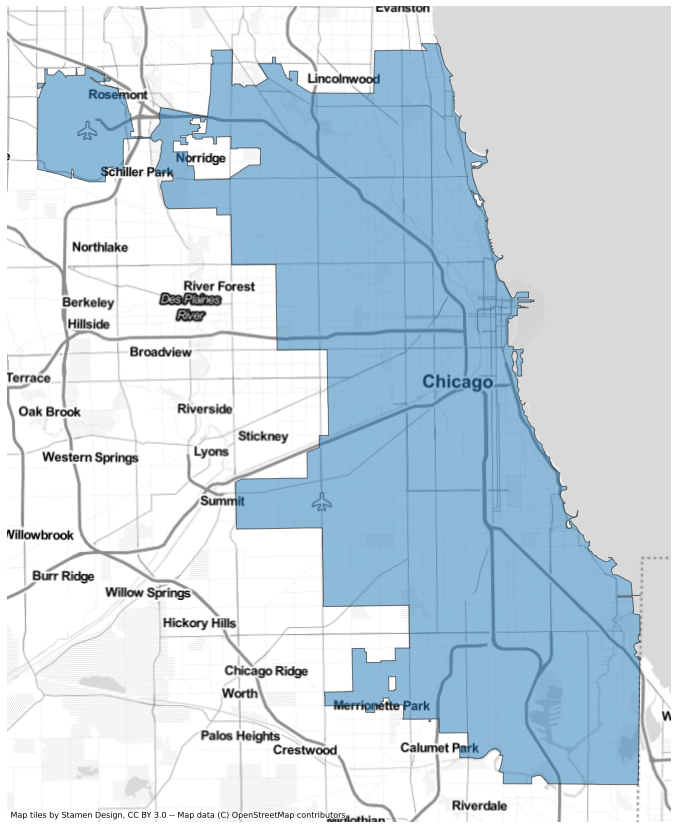

In [64]:
#add basemap with contextily
ax = chicago_boundaries.plot(figsize=(15,15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax,crs=32616,source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

### Segment Cook County data for Chicago

#### Use Clip to segment for schools

In [69]:
school_cook_chicago_clip = gpd.clip(school_cook_county,chicago_boundaries)

In [70]:
school_cook_county.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   address     2332 non-null   object  
 1   cfname      2332 non-null   object  
 2   cfsubtype   2332 non-null   object  
 3   cftype      2332 non-null   object  
 4   comment     141 non-null    object  
 5   community   2332 non-null   object  
 6   gniscode    2332 non-null   float64 
 7   jurisdicti  2154 non-null   object  
 8   mergeid     2332 non-null   object  
 9   shape_area  2332 non-null   float64 
 10  shape_len   2332 non-null   float64 
 11  source      2332 non-null   object  
 12  geometry    2332 non-null   geometry
dtypes: float64(3), geometry(1), object(9)
memory usage: 237.0+ KB


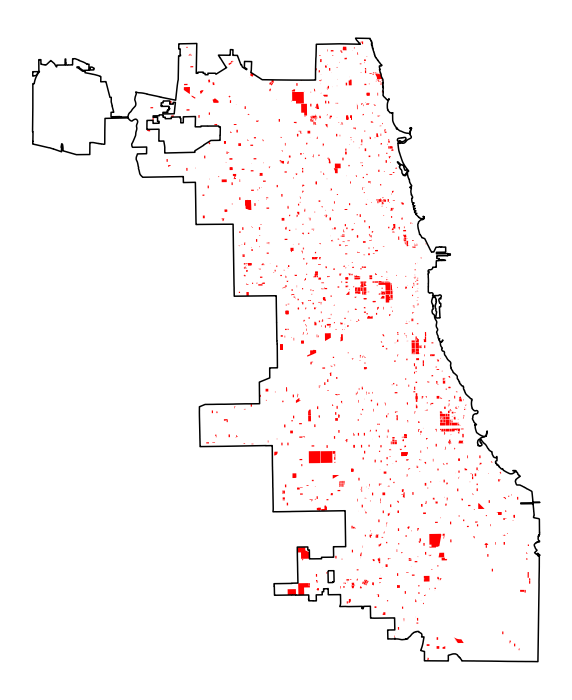

In [71]:
# clipped schools for chicago
basemap = chicago_boundaries.boundary.plot(color='k', figsize=(10,20))
school_cook_chicago_clip.plot(ax=basemap,color='red')
basemap.axis('off')
plt.show()

#### Use Clip to sement daycare's for Chicago

In [72]:
daycare_chicago_clip = gpd.clip(daycare,chicago_boundaries)

In [73]:
daycare_chicago_clip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 135 entries, 332 to 935
Columns: 119 entries, pin10 to geometry
dtypes: float64(27), geometry(1), int64(8), object(83)
memory usage: 126.6+ KB


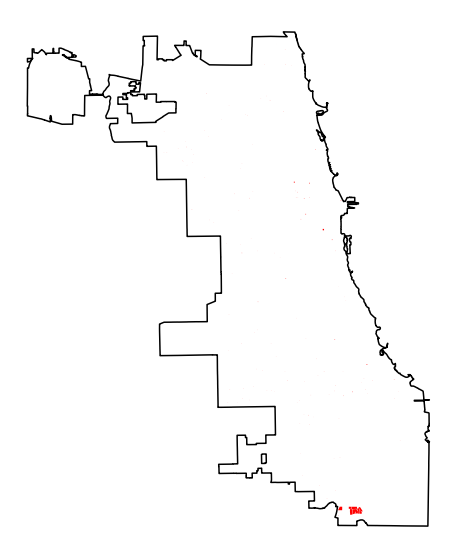

In [74]:
basemap = chicago_boundaries.boundary.plot(color='k',figsize=(20,10))
daycare_chicago_clip.plot(color='red',ax=basemap)
basemap.axis('off')
plt.show()

### Next Steps
- pull in boundary data i.e. census tract, cook county, zip code etc by transforming in data gathering notebook and pickle
- import some sort of a base layer to overlay geometry on 
- maybe pinpoint the locations the convicted have to report to daily, and mark them on the map
- overlay each shapefile on base layer to start looking at some commonalities
- perhaps also look at soem boxplots/histograms and scatterplots
